In [62]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import numpy


Data = pd.read_csv("reddit_train.csv",sep=",",usecols=[1,2])
Data = Data.sample(frac=1).reset_index(drop=True)

Test = pd.read_csv("reddit_test.csv",sep=",")
Test = Test.sample(frac=1).reset_index(drop=True)





Data.head(5)

,comments,subreddits
0,"Yeah, dunno. To be really german, she haz to w...",europe
1,Cannot confirm. Taught my gf to play a couple ...,leagueoflegends
2,But they will be held accountable should they ...,europe
3,"Both parties are technically right, but Lisa w...",funny
4,"I don't think that it's completely normal, it'...",worldnews


In [3]:
Data.shape

(70000, 2)

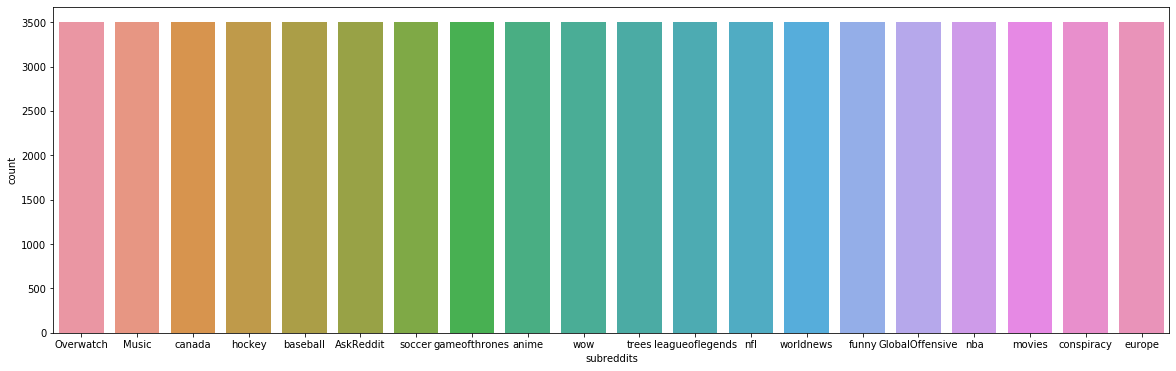

In [14]:
dims = (20, 6)
fig= plt.subplots(figsize=dims)
sb.countplot(x= 'subreddits' ,data=Data)

In [18]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
print(stopWords)

{'against', 'own', 'this', 'so', 'should', 'only', 'over', "you'd", 'in', 'he', "you've", 'y', 'mustn', 'when', 'ourselves', 'than', 'there', 'below', 'some', 'while', 'down', 't', 'hasn', 'himself', 'between', "needn't", 'again', 'my', 'few', 'wasn', 'our', 'as', 'theirs', 'once', 'mightn', 'during', 'for', 'these', 'didn', 'to', "shouldn't", 'or', 'having', 'further', 'its', 'wouldn', 'him', 'no', "you're", 'until', 'she', 'can', 'you', "isn't", "won't", 'and', 'has', 'through', "haven't", 'o', 'haven', 'under', "mustn't", 'are', 'd', 'yours', 'be', 'where', 're', 'your', 'above', 'we', 'all', 'any', "wouldn't", "shan't", 'the', "hasn't", "weren't", 'does', "you'll", 'who', 'had', 'both', 'other', 'yourself', 'off', 'with', 'doesn', 'it', 'couldn', 'a', "don't", 'll', 'needn', 'by', 've', 'how', 'were', 'itself', 'was', 'her', "she's", 'why', 'do', "hadn't", 'shan', 'of', 's', 'from', 'now', "doesn't", 'they', 'same', 'his', "that'll", 'an', 'have', 'is', 'each', 'will', 'aren', 'wha

In [19]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()

enc.fit(["nba","hockey","leagueoflegends","soccer","funny","movies","anime","Overwatch","trees","GlobalOffensive","nfl","AskReddit",
         "gameofthrones","conspiracy","worldnews","Music","wow","europe","canada","baseball"])




X_train= Data.comments
y_train= enc.transform(Data.subreddits)
X_test= Test.comments




In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words=stopWords, ngram_range=(1, 3))
 

Xtrain=vec.fit_transform(X_train)
Xtest= vec.transform(X_test)

In [59]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
XtrainSVD=svd.fit_transform(Xtrain)
XtestSVD=svd.transform(Xtest)

(30000, 100)